In [1]:
import numpy as np

# Getting Matrix Values
mCSV = np.genfromtxt("series.csv", skip_header=1, delimiter=",", dtype=float)
mCSVt = np.transpose(mCSV)

# Set the floatmode to 'fixed'
np.set_printoptions(floatmode='fixed')

# Display the transposed CSV data
print(mCSVt.astype(int))


[[   0    1    2    3    4    5    6    7    8    9   10   11   12]
 [   5    9   13   17   21   25   29   33   37   41   45   49   53]
 [   5   12   25   44   69  100  137  180  229  284  345  412  485]
 [   5   14   41   98  197  350  569  866 1253 1742 2345 3074 3941]]


In [2]:
from sympy import symbols, Eq
from IPython.display import display

# Define symbols
x = symbols('x')

# Define equations
y1 = symbols('y1')
y2 = symbols('y2')
y3 = symbols('y3')

# Define equations
y1_eq = Eq(y1, -721 - 306*x)
y2_eq = Eq(y2, 137 - 162*x + 39*x**2)
y3_eq = Eq(y3, 5 - 4*x + 3*x**2 + 2*x**3)

# Display equations
display(y1_eq)
display(y2_eq)
display(y3_eq)

Eq(y1, -306*x - 721)

Eq(y2, 39*x**2 - 162*x + 137)

Eq(y3, 2*x**3 + 3*x**2 - 4*x + 5)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List

In [4]:
class CurveFitting:
  def __init__(self, xs, ys : List[int]) -> None:

    # Given data
    self.xs = np.array(xs)
    self.ys = np.array(ys)

  def calc_coeff(self, order) -> np.ndarray:
    # Perform regression using polyfit,
    mC = np.polyfit(self.xs, self.ys, deg=order)

    # Display
    coeff_text = {
      1: '(a, b)', 2: '(a, b, c)', 3: '(a, b, c, d)'}
    order_text = {
      1: 'Linear',  2: 'Quadratic ', 3: 'Cubic'}

    print(f'Using polyfit : {order_text[order]}')
    print(f'Coefficients  : {coeff_text[order]}:'
      + f'\n\t{np.flip(mC)}\n')

    # Get coefficient matrix
    return mC

  def calc_plot_all(self) -> None:
    self.x_plot = xp = np.linspace(
      min(self.xs), max(self.xs), 100)

    # Calculate coefficients directly
    self.y1_plot = np.polyval(self.calc_coeff(1), xp)
    self.y2_plot = np.polyval(self.calc_coeff(2), xp)
    self.y3_plot = np.polyval(self.calc_coeff(3), xp)

  def draw_plot(self) -> None:
    plt.scatter(self.xs, self.ys, color='teal',
      label='Data points', )
    plt.plot(self.x_plot, self.y1_plot, color='red',
      label='Linear Equation')
    plt.plot(self.x_plot, self.y2_plot, color='green',
      label='Fitted second-order polynomial')
    plt.plot(self.x_plot, self.y3_plot, color='blue',
      label='Fitted third-order polynomial')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Curve Fitting')

    plt.show()

  def process(self) -> None:
    self.calc_plot_all()
    self.draw_plot()

Using polyfit : Linear
Coefficients  : (a, b):
	[-721.00000000  306.00000000]

Using polyfit : Quadratic 
Coefficients  : (a, b, c):
	[ 137.00000000 -162.00000000   39.00000000]

Using polyfit : Cubic
Coefficients  : (a, b, c, d):
	[5.00000000 4.00000000 3.00000000 2.00000000]



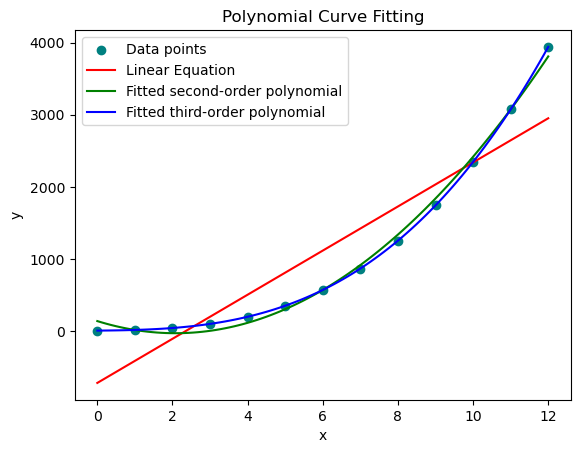

In [5]:
def main() -> int:
  # Getting Matrix Values
  mCSV = np.genfromtxt("series.csv",
    skip_header=1, delimiter=",", dtype=float)
  mCSVt   = np.transpose(mCSV)

  example = CurveFitting(mCSVt[0], mCSVt[3])
  example.process()

if __name__ == "__main__":
  main()